## Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [3]:
data_path = "../data/kc_house_data.csv"
df = pd.read_csv(data_path)

## Exploring the Data

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Preprocessing The Data

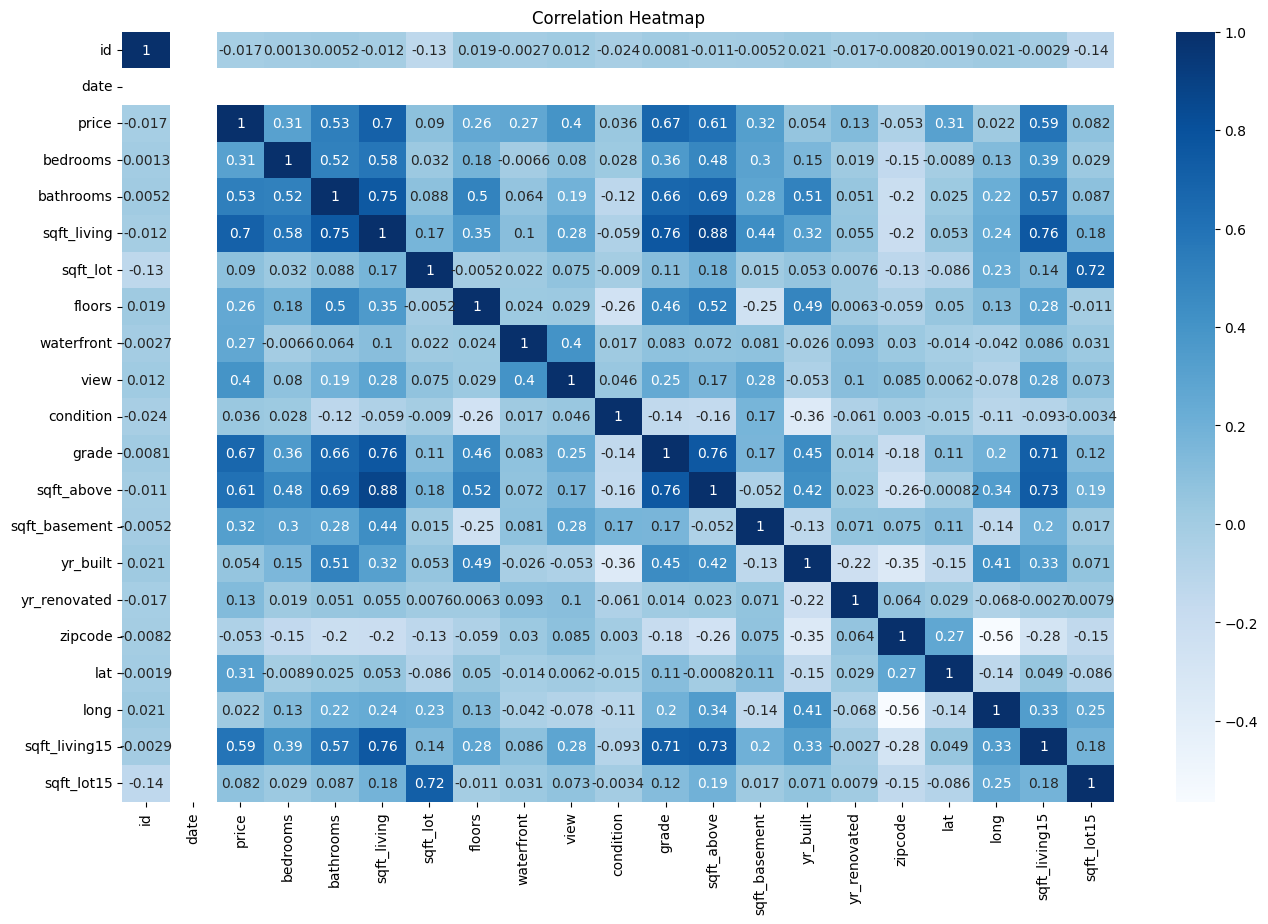

In [9]:
df['date'] = pd.to_numeric(df['date'], errors='coerce')
correlation_matrix = df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

After displaying the heatmap we can notice that there are some columns that do not affect or not have a strong relation with the price
so we can delete these columns:
- id
- date
- sqft_lot
- condition
- zipcode
- long
- sqft_lot15

In [10]:
df.drop(columns=['id', 'date', 'sqft_lot', 'condition', 'zipcode', 'long', 'sqft_lot15','yr_renovated','lat','floors','waterfront','sqft_basement'], inplace=True)

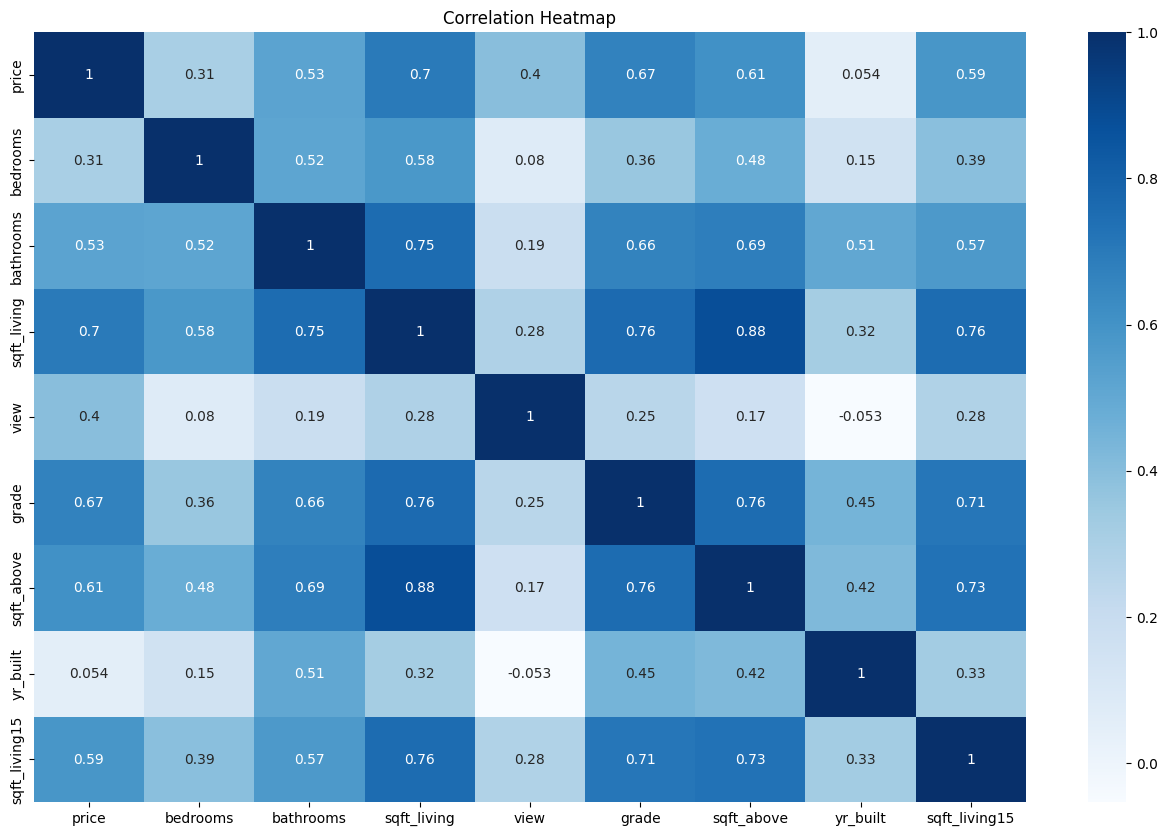

In [11]:
correlation_matrix = df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

In [12]:
df

,price,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,yr_built,sqft_living15
0,221900.0,3,1.00,1180,0,7,1180,1955,1340
1,538000.0,3,2.25,2570,0,7,2170,1951,1690
2,180000.0,2,1.00,770,0,6,770,1933,2720
3,604000.0,4,3.00,1960,0,7,1050,1965,1360
4,510000.0,3,2.00,1680,0,8,1680,1987,1800
...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,0,8,1530,2009,1530
21609,400000.0,4,2.50,2310,0,8,2310,2014,1830
21610,402101.0,2,0.75,1020,0,7,1020,2009,1020
21611,400000.0,3,2.50,1600,0,8,1600,2004,1410


## Building The 5 Models

In [13]:
x = df.drop(columns='price')
y = df.price

In [14]:
x

,bedrooms,bathrooms,sqft_living,view,grade,sqft_above,yr_built,sqft_living15
0,3,1.00,1180,0,7,1180,1955,1340
1,3,2.25,2570,0,7,2170,1951,1690
2,2,1.00,770,0,6,770,1933,2720
3,4,3.00,1960,0,7,1050,1965,1360
4,3,2.00,1680,0,8,1680,1987,1800
...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,0,8,1530,2009,1530
21609,4,2.50,2310,0,8,2310,2014,1830
21610,2,0.75,1020,0,7,1020,2009,1020
21611,3,2.50,1600,0,8,1600,2004,1410


In [15]:
# Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 2, test_size = 0.2)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop("price", axis=1))

StandardScaler()

In [17]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
x_test

array([[ 0.67648506,  0.1756067 ,  0.35942204, ..., -0.39657272,
        -1.43007252, -0.91417411],
       [-0.39873715, -0.79823546,  0.09810359, ..., -0.79508887,
         0.27218661,  1.66835201],
       [-1.47395936, -1.44746357, -0.68585176, ..., -0.40864896,
        -0.13635558, -1.08926063],
       ...,
       [ 0.67648506,  0.50022075,  0.62074049, ...,  1.0405007 ,
         0.74881917,  0.76373834],
       [-1.47395936, -1.44746357, -1.3718127 , ..., -1.16945254,
        -1.6683888 , -1.00171737],
       [ 0.67648506,  0.8248348 , -0.29387409, ...,  0.02609594,
        -0.30658149, -0.35973347]])

In [20]:
import mlflow
import mlflow.sklearn

In [21]:
mlflow.end_run()

In [22]:
from sklearn.metrics import mean_squared_error


def evaluate(sk_model, x_test, y_test):
    eval_acc = sk_model.score(x_test, y_test)
    preds = sk_model.predict(x_test)
    mse = mean_squared_error(y_test, preds)
    mlflow.log_metric("eval_acc", eval_acc) # nous avons fait la même chose pour l'accuracy de test (evaluation)
    mlflow.log_metric("mse", mse)# aussi pour l'AUC score 
    print(f"Eval Accuracy: {eval_acc:.3%}")
    print(f"MSE: {mse:.3%}")
    plt.clf()
    plt.scatter(y_test, preds)
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.savefig("sklearn_scatter.png")
    mlflow.log_artifact("sklearn_scatter.png")

### Model 1

2023/11/29 22:52:37 INFO mlflow.tracking.fluent: Experiment with name 'scikit_learn_experiment' does not exist. Creating a new experiment.


Train Accuracy: 62.937%
Eval Accuracy: 65.384%
MSE: 4832687107203.435%
Model run:  399963205edf4246a183d2b99f55ed19


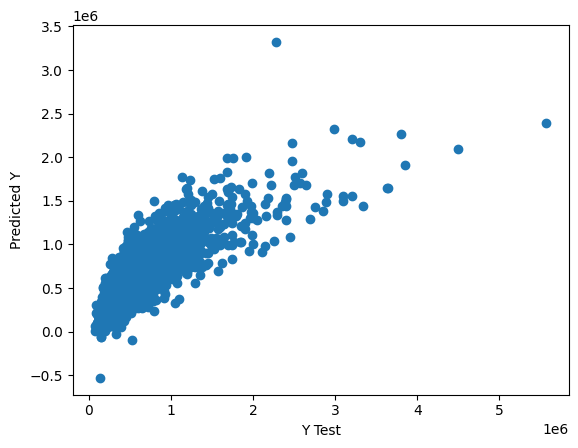

In [23]:
sk_model = LinearRegression()
mlflow.set_experiment("scikit_learn_experiment")
with mlflow.start_run():
    sk_model = sk_model.fit(x_train, y_train)
    train_acc = sk_model.score(x_train, y_train)
    mlflow.log_metric("train_acc", train_acc) # ce bout de code va nous aider à suivre la mesure training accuracy. nous avons dit à Mlflow de suivre cette métrique à chaque exécution de code
    print(f"Train Accuracy: {train_acc:.3%}")
    evaluate(sk_model, x_test, y_test)
    mlflow.sklearn.log_model(sk_model, "log_reg_model")
    print("Model run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()

Train Accuracy: 62.937%
Eval Accuracy: 65.384%
MSE: 4832654511395.684%
Model run:  99dbd997e5a54f8abe8786e6160081e7


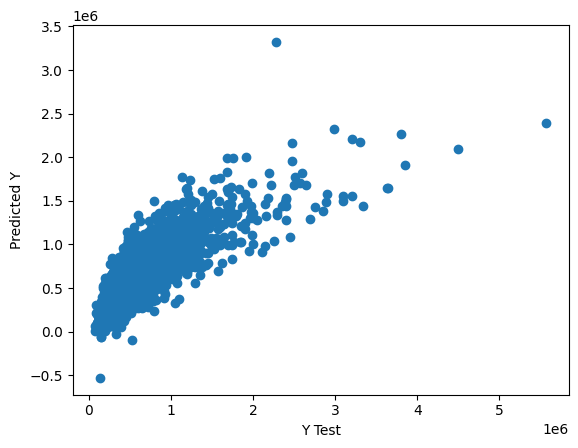

In [24]:
from sklearn.linear_model import Ridge
sk_model = Ridge(alpha=1.0)

mlflow.set_experiment("scikit_learn_experiment")
with mlflow.start_run():
    sk_model = sk_model.fit(x_train, y_train)
    train_acc = sk_model.score(x_train, y_train)
    mlflow.log_metric("train_acc", train_acc) # ce bout de code va nous aider à suivre la mesure training accuracy. nous avons dit à Mlflow de suivre cette métrique à chaque exécution de code
    print(f"Train Accuracy: {train_acc:.3%}")
    evaluate(sk_model, x_test, y_test)
    mlflow.sklearn.log_model(sk_model, "log_reg_model")
    print("Model run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()


Train Accuracy: 62.937%
Eval Accuracy: 65.384%
MSE: 4832689140100.048%
Model run:  85bc8070e3d945f295e66947c3eb9469


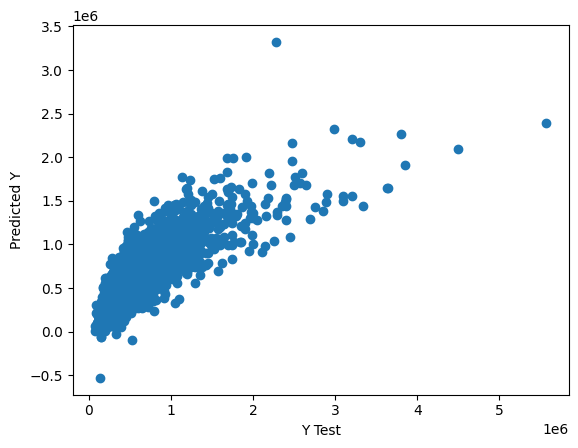

In [25]:
from sklearn.linear_model import Lasso
sk_model = Lasso(alpha=1.0)

mlflow.set_experiment("scikit_learn_experiment")
with mlflow.start_run():
    sk_model = sk_model.fit(x_train, y_train)
    train_acc = sk_model.score(x_train, y_train)
    mlflow.log_metric("train_acc", train_acc) # ce bout de code va nous aider à suivre la mesure training accuracy. nous avons dit à Mlflow de suivre cette métrique à chaque exécution de code
    print(f"Train Accuracy: {train_acc:.3%}")
    evaluate(sk_model, x_test, y_test)
    mlflow.sklearn.log_model(sk_model, "log_reg_model")
    print("Model run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()




Train Accuracy: 99.913%
Eval Accuracy: 40.659%
MSE: 8284548261261.757%
Model run:  6a3e7495e0864f0cac3f329020984d64


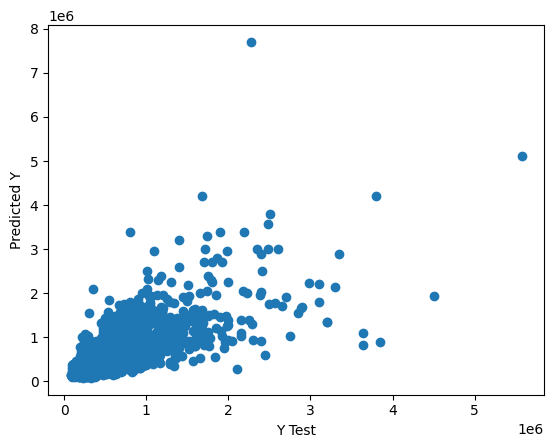

In [26]:
from sklearn.tree import DecisionTreeRegressor
sk_model = DecisionTreeRegressor()

mlflow.set_experiment("scikit_learn_experiment")
with mlflow.start_run():
    sk_model = sk_model.fit(x_train, y_train)
    train_acc = sk_model.score(x_train, y_train)
    mlflow.log_metric("train_acc", train_acc) # ce bout de code va nous aider à suivre la mesure training accuracy. nous avons dit à Mlflow de suivre cette métrique à chaque exécution de code
    print(f"Train Accuracy: {train_acc:.3%}")
    evaluate(sk_model, x_test, y_test)
    mlflow.sklearn.log_model(sk_model, "log_reg_model")
    print("Model run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()


Train Accuracy: 95.822%
Eval Accuracy: 68.916%
MSE: 4339540533515.737%
Model run:  7e698058630d45eda320a39ebf659652


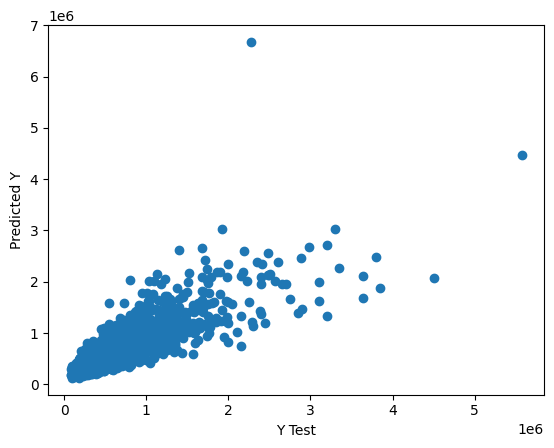

In [27]:
from sklearn.ensemble import RandomForestRegressor
sk_model = RandomForestRegressor(n_estimators=100)

mlflow.set_experiment("scikit_learn_experiment")
with mlflow.start_run():
    sk_model = sk_model.fit(x_train, y_train)
    train_acc = sk_model.score(x_train, y_train)
    mlflow.log_metric("train_acc", train_acc) # ce bout de code va nous aider à suivre la mesure training accuracy. nous avons dit à Mlflow de suivre cette métrique à chaque exécution de code
    print(f"Train Accuracy: {train_acc:.3%}")
    evaluate(sk_model, x_test, y_test)
    mlflow.sklearn.log_model(sk_model, "log_reg_model")
    print("Model run: ", mlflow.active_run().info.run_uuid)
mlflow.end_run()


after doing comparison in mlflow, i found that the best model in terms of mse is ensembliste model randomforestresgressor with run id "76c0a8ed7d1146d584669f7622c3f"

In [75]:
# • Save your best model in ONNX format and its dedicated preprocessing transformations (i.e., using transformers API) in pickle format

import pickle
import onnxruntime as rt
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Convert the model to ONNX
initial_type = [('float_input', FloatTensorType([None, 8]))]
onx = convert_sklearn(sk_model, initial_types=initial_type)

# Save the ONNX model
with open("model.onnx", "wb") as f:
    f.write(onx.SerializeToString())

# Save the preprocessing pipeline
with open("preprocessing.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [29]:

import onnxruntime as rt
# load the model
sess = rt.InferenceSession("model.onnx")

In [32]:

import pickle
# lx    oad the preprocessing pipeline
with open("preprocessing.pkl", "rb") as f:
    scaler = pickle.load(f)

In [37]:
# chose a row from the test set to test the model on it 
row = x_test[1:2]
# apply the preprocessing pipeline on the row
row = scaler.transform(row)
# convert the row to float32
row = row.astype(np.float32)
# run the model on the row
pred_onx = sess.run(None, {'float_input': row})
# print the prediction
print(pred_onx)

# make fastapi app to serve the model 
from fastapi import FastAPI
from pydantic import BaseModel
import numpy as np
import pickle
import onnxruntime as rt
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# load the model
sess = rt.InferenceSession("model.onnx")
# load the preprocessing pipeline
with open("preprocessing.pkl", "rb") as f:
    scaler = pickle.load(f)

# create the app
app = FastAPI()

# create a class to define the request body
class Data(BaseModel):
    data: list

# define the post method
@app.post("/predict")
def predict(data: Data):
    # convert the data to numpy array
    data = np.array(data.data)
    # apply the preprocessing pipeline
    data = scaler.transform(data)
    # convert the data to float32
    data = data.astype(np.float32)
    # run the model on the data
    pred_onx = sess.run(None, {'float_input': data})
    # return the prediction
    return {"prediction": pred_onx[0].tolist()}

# run the app
# uvicorn app:app --reload
# go to http

[array([[6934443.]], dtype=float32)]
